# Stochastic Gradient Descent

## Import and Settings

In [2]:
import numpy as np

In [3]:
import dask
import dask.dataframe as dd
import dask.array as da

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [5]:
from joblib import dump, load

In [6]:
df = dd.read_csv('prepared_ds.csv')

In [7]:
# load model to skip next parts
clf = load('models/sgd.joblib')

## df_fast initialisieren (size = 0.01)

In [81]:
df_fast = df.sample(frac=0.01, random_state = 1).compute()
df_fast.shape

(75650, 41)

## train, test split

## trainieren (80, 20, random_state = 1)

In [82]:
train, test, train_lbl, test_lbl = train_test_split(df_fast[df_fast.columns[1:-1]], df_fast['Label'], 
                                                    test_size=0.2, random_state=1)

## Model

In [83]:
clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=2000, tol=1e-3)

In [84]:
clf.fit(train, train_lbl)

SGDClassifier(loss='modified_huber', max_iter=2000)

## Accuracy

In [85]:
clf.predict(test)
clf.score(test, test_lbl)

0.9872438863185724

In [87]:
loss_options = ["hinge", "log", "modified_huber", "squared_hinge", "perceptron", "squared_loss", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"]
penalty_options = ["l2", "l1", "elasticnet"]

scores = {}
for loss_option in loss_options:
    for penalty_option in penalty_options:
        clf = SGDClassifier(loss=loss_option, penalty=penalty_option, max_iter=2000, tol=1e-3)
        clf.fit(train, train_lbl)
        score = clf.score(test, test_lbl)
        scores[score] = [loss_option, penalty_option]
        
for i in sorted(scores):
    print(i, scores[i])

0.36437541308658294 ['squared_epsilon_insensitive', 'l1']
0.5144745538664904 ['squared_loss', 'l1']
0.591606080634501 ['squared_epsilon_insensitive', 'l2']
0.5945142101784534 ['squared_epsilon_insensitive', 'elasticnet']
0.6497025776602776 ['squared_loss', 'l2']
0.6949107732980833 ['squared_loss', 'elasticnet']
0.866226040978189 ['perceptron', 'elasticnet']
0.9192333113020489 ['squared_hinge', 'l2']
0.9300727032385988 ['squared_hinge', 'elasticnet']
0.9564441506939855 ['epsilon_insensitive', 'l1']
0.9615994712491738 ['huber', 'elasticnet']
0.9617316589557171 ['huber', 'l1']
0.9618638466622604 ['epsilon_insensitive', 'elasticnet']
0.9623265036351619 ['huber', 'l2']
0.9633840052875082 ['epsilon_insensitive', 'l2']
0.9723066754791805 ['squared_hinge', 'l1']
0.974619960343688 ['log', 'l2']
0.9782551222736285 ['perceptron', 'l2']
0.9783873099801719 ['log', 'elasticnet']
0.9821546596166556 ['perceptron', 'l1']
0.9853271645736946 ['modified_huber', 'l1']
0.9866490416391276 ['hinge', 'l2']
0.9

## confusion matrix (fp (wenn 1 (positiv) = DDoS) minimieren)

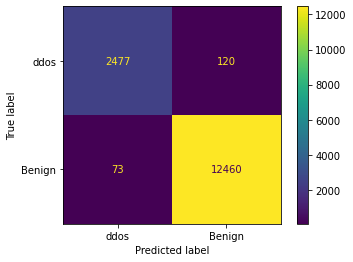

In [86]:
confusion_mtx = confusion_matrix(test_lbl, clf.predict(test))
np.round(confusion_mtx/len(test_lbl), 3)
plot_confusion_matrix(clf, test, test_lbl, labels=['ddos', 'Benign'])

## Modell speichern

In [109]:
dump(clf, 'models/sgd.joblib')

['models/sgd.joblib']